In [1]:
import numpy as np
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
TRACK_NAME = "reInvent2019_track"
# TRACK_NAME = "Canada_Training"
waypoints = np.load("./%s.npy" % TRACK_NAME)

In [3]:
center_line = waypoints[:,0:2]
inner_border = waypoints[:,2:4]
outer_border = waypoints[:,4:6]
l_center_line = LineString(center_line)
l_inner_border = LineString(inner_border)
l_outer_border = LineString(outer_border)

In [4]:
for x in range(0,155):
    print(str(x)+" : ")
    print(center_line[x])

0 : 
[0.307878   2.83060753]
1 : 
[0.32365686 2.68032849]
2 : 
[0.34496535 2.53074002]
3 : 
[0.37292039 2.38224852]
4 : 
[0.40683891 2.23500252]
5 : 
[0.44602525 2.08906847]
6 : 
[0.49285656 1.94542652]
7 : 
[0.55045813 1.80576599]
8 : 
[0.61999089 1.67165703]
9 : 
[0.70202522 1.54481751]
10 : 
[0.79915337 1.42926097]
11 : 
[0.91470039 1.33219576]
12 : 
[1.04656261 1.25887662]
13 : 
[1.19022501 1.21275359]
14 : 
[1.33994699 1.19373798]
15 : 
[1.49100804 1.19498184]
16 : 
[1.64160848 1.20709264]
17 : 
[1.79134101 1.22735822]
18 : 
[1.94048601 1.25164664]
19 : 
[2.08953357 1.27651089]
20 : 
[2.23866951 1.3008531 ]
21 : 
[2.38798451 1.32407165]
22 : 
[2.53842556 1.33726159]
23 : 
[2.68942499 1.33341277]
24 : 
[2.83894849 1.31250498]
25 : 
[2.98254693 1.26607651]
26 : 
[3.11551106 1.19464037]
27 : 
[3.23526204 1.10267687]
28 : 
[3.34111154 0.99496675]
29 : 
[3.43600547 0.87740791]
30 : 
[3.52554893 0.75568691]
31 : 
[3.62269449 0.64002268]
32 : 
[3.73149562 0.53524975]
33 : 
[3.85095036 0.

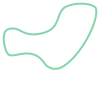

In [5]:
l_inner_border

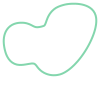

In [6]:
l_outer_border

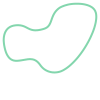

In [7]:
l_center_line

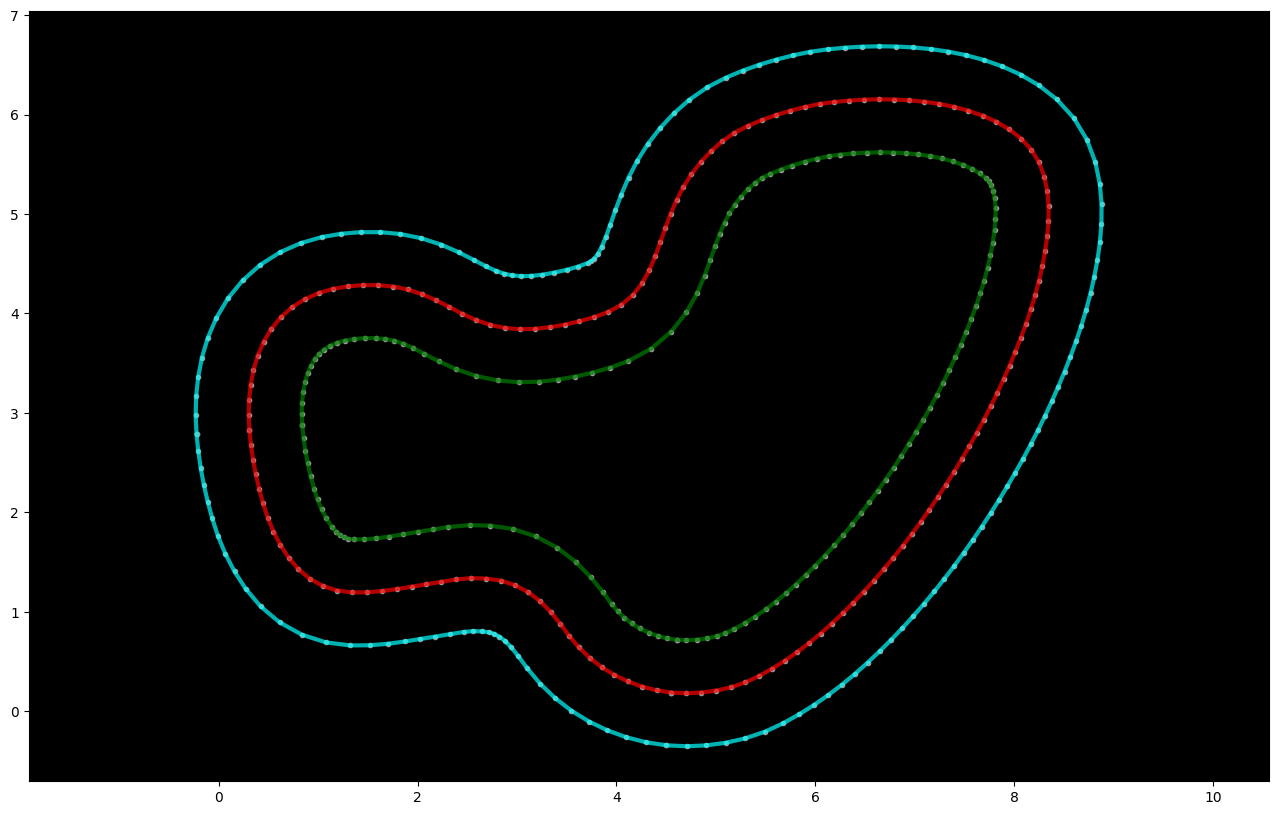

In [8]:
def plot_coords(ax, ob):                                                        
    x, y = ob.xy                                                                
    ax.plot(x, y, '.', color='#999999', zorder=1)                               
                                                                                
def plot_bounds(ax, ob):                                                        
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))                          
    ax.plot(x, y, '.', color='#000000', zorder=1)                               
                                                                                
def plot_line(ax, ob, _color):                                                          
    x, y = ob.xy                                                                
    ax.plot(x, y, color=_color, alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                                                                                
def print_border(ax, waypoints, inner_border_waypoints, outer_border_waypoints):
    line = LineString(waypoints)                                                
    plot_coords(ax, line)                                                       
    plot_line(ax, line, 'red')                                                         
                                                                                
    line = LineString(inner_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line, 'green')                                                         
                                                                                
    line = LineString(outer_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line, 'cyan')     

fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, center_line, inner_border, outer_border)

In [9]:
center_line.size
center_line.shape


(155, 2)

In [10]:
perpendicular_slope = []
length = center_line.shape[0]

def slope_division(n, d, x):
    if n == 0 and d == 0 and len(perpendicular_slope) >= (x-1)%length:
        return -1 * (1/perpendicular_slope[(x-1)%length])
    return n / d if d else None

for x in range(0,length):
    a = center_line[x]
    b = center_line[(x+1)%length]
    if a[0] == b[0] and a[1] == b[1]:
        a = center_line[(x-1)%length]
        b = center_line[x]
    slope = slope_division((b[1] - a[1]),(b[0] - a[0]), x)
#     slope = ((a[1] - b[1])/(a[0] - b[0]))
    print("Slope for " + str(x) + " : " + str(slope))
    
    if slope is None:
        perpendicular_slope.append(0)
#         continue
    elif slope == 0:
        perpendicular_slope.append(None)
#         continue
    else:
        perpendicular_slope.append(-1*(1/slope))
    
    print("Perpendicular Slope for " + str(x) + " : " + str(perpendicular_slope[x]))
    

Slope for 0 : -9.524078266051312
Perpendicular Slope for 0 : 0.10499703720038837
Slope for 1 : -7.02013477730765
Perpendicular Slope for 1 : 0.14244740759571548
Slope for 2 : -5.3117956708083
Perpendicular Slope for 2 : 0.18826025358912749
Slope for 3 : -4.34116846329347
Perpendicular Slope for 3 : 0.23035272840836502
Slope for 4 : -3.7241053856630124
Perpendicular Slope for 4 : 0.26852086513173884
Slope for 5 : -3.0672201241647055
Perpendicular Slope for 5 : 0.3260281165090261
Slope for 6 : -2.4245963054579156
Perpendicular Slope for 6 : 0.41243979368810324
Slope for 7 : -1.9287160073420606
Perpendicular Slope for 7 : 0.5184796497738864
Slope for 8 : -1.546176131953058
Perpendicular Slope for 8 : 0.6467568469944277
Slope for 9 : -1.1897326852976913
Perpendicular Slope for 9 : 0.8405249451054487
Slope for 10 : -0.8400494749381273
Perpendicular Slope for 10 : 1.1904060770630844
Slope for 11 : -0.5560283707178247
Perpendicular Slope for 11 : 1.7984693815335613
Slope for 12 : -0.321051506

In [11]:
rows, cols = (center_line.shape[0], center_line.shape[1])

distance = 0.5

def isLeft(a, b, c):
    if a[0] == b[0] and a[1] == b[1]:
        return True
    else:
        return ((b[0] - a[0])*(c[1] - a[1]) - (b[1] - a[1])*(c[0] - a[0])) > 0;

new_outer_points = [[0 for i in range(cols)] for j in range(rows)]
new_inner_points = [[0 for i in range(cols)] for j in range(rows)]

for x in range(0, length):
    print(str(x) +" : ")
    if perpendicular_slope[x] is None: 
        new_outer_points[x][0] = center_line[x][0]
        new_outer_points[x][1] = center_line[x][1]  - distance
        new_inner_points[x][0] = center_line[x][0]
        new_inner_points[x][1] = center_line[x][1]  + distance
        print("Zero detected")
    elif perpendicular_slope[x] == 0:
        new_outer_points[x][0] = center_line[x][0]  - distance
        new_outer_points[x][1] = center_line[x][1]  
        new_inner_points[x][0] = center_line[x][0]  + distance
        new_inner_points[x][1] = center_line[x][1]  
        print("None detected")
    else:    
        dx = distance / (math.sqrt((1+(perpendicular_slope[x]**2))))
        print(dx)
        dy = perpendicular_slope[x] * dx
        print(dy)

        new_point = [0] * 2
        new_point[0] = center_line[x][0] - dx
        new_point[1] = center_line[x][1] - dy
        if center_line[x][0] == center_line[(x+1)%length][0] and center_line[x][1] == center_line[(x+1)%length][1]:
            print(str(x) + " AND " + str(x-1))
            pointOnLeft = isLeft(center_line[(x-1)%length], center_line[x], new_point)
        else:
            print(str(x) + " AND " + str(x+1))
            pointOnLeft = isLeft(center_line[x], center_line[(x+1)%length], new_point)
            
        print("IS IT LEFT : " + str(pointOnLeft))
        if (pointOnLeft):
            new_outer_points[x][0] = center_line[x][0] + dx
            new_outer_points[x][1] = center_line[x][1] + dy
            print("Left here Outside")
            new_inner_points[x][0] = new_point[0]
            new_inner_points[x][1] = new_point[1]
            print("Right here Inside")
            
        else:
            new_outer_points[x][0] = new_point[0]
            new_outer_points[x][1] = new_point[1]
            print("Right here Outside")
            new_inner_points[x][0] = center_line[x][0] + dx
            new_inner_points[x][1] = center_line[x][1] + dy
            print("Left here Inside")
            
        
            

#     new_sub_points[x][0] = center_line[x][0] - (distance * (math.sqrt(1/(1+(perpendicular_slope[x]**2)))))
#     new_sub_points[x][1] = center_line[x][1] - ((distance * perpendicular_slope[x])  * (math.sqrt(1/(1+(perpendicular_slope[x]**2)))))
    
    print(new_outer_points[x])
    print(new_inner_points[x])
    

0 : 
0.49726648635989296
0.0522115077668361
0 AND 1
IS IT LEFT : False
Right here Outside
Left here Inside
[-0.18938848383551704, 2.778396025688059]
[0.8051444888842689, 2.882819041221731]
1 : 
0.49500310175397066
0.07051190859669128
1 AND 2
IS IT LEFT : False
Right here Outside
Left here Inside
[-0.17134624474026827, 2.609816579753223]
[0.8186599587676731, 2.750840396946606]
2 : 
0.4913682964499731
0.0925051200953295
2 AND 3
IS IT LEFT : False
Right here Outside
Left here Inside
[-0.14640295029242228, 2.4382349025639725]
[0.8363336426075239, 2.623245142754631]
3 : 
0.4872400233891377
0.11223706877744345
3 AND 4
IS IT LEFT : False
Right here Outside
Left here Inside
[-0.11431962944535107, 2.2700114520736916]
[0.8601604173329243, 2.494485589628579]
4 : 
0.4828938301596454
0.12966706904124695
4 AND 5
IS IT LEFT : False
Right here Outside
Left here Inside
[-0.07605491764281302, 2.1053354486589484]
[0.8897327426764777, 2.3646695867414422]
5 : 
0.4753731633932453
0.1549850171000373
5 AND 6


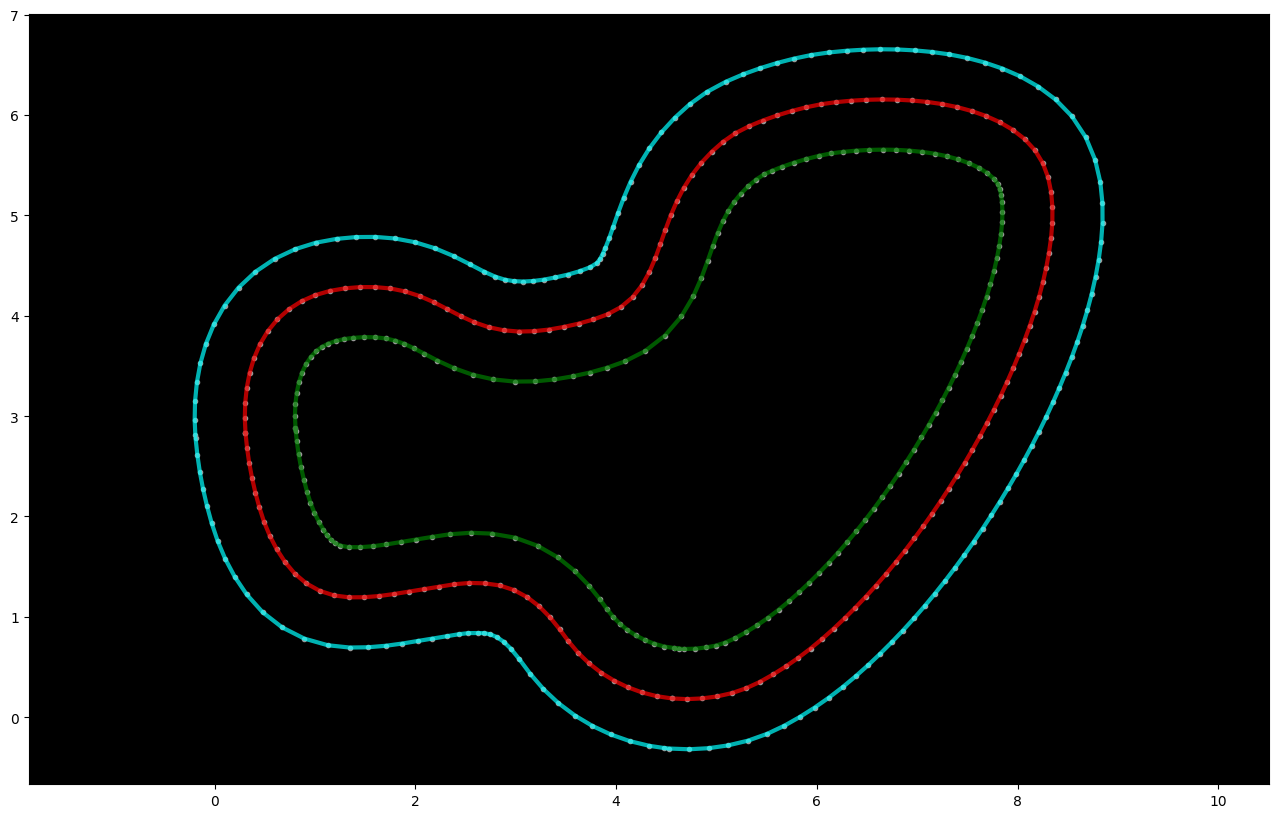

In [12]:
fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
np_outer_points = np.asarray(new_outer_points)
np_inner_points = np.asarray(new_inner_points)
print_border(ax, center_line, np_inner_points, np_outer_points)

In [13]:
# From https://github.com/e-koch/ewky_scripts/blob/master/curvature.py

# The MIT License (MIT)
#
# Copyright (c) 2014 Eric Koch
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

def menger_curvature(pt1, pt2, pt3, atol=1e-3):

    vec21 = np.array([pt1[0]-pt2[0], pt1[1]-pt2[1]])
    vec23 = np.array([pt3[0]-pt2[0], pt3[1]-pt2[1]])

    norm21 = np.linalg.norm(vec21)
    norm23 = np.linalg.norm(vec23)

    theta = np.arccos(np.dot(vec21, vec23)/(norm21*norm23))
    if np.isclose(theta-np.pi, 0.0, atol=atol):
        theta = 0.0

    dist13 = np.linalg.norm(vec21-vec23)

    return 2*np.sin(theta) / dist13

In [17]:
import copy
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString

# Number of times to iterate each new race line point
# keep this at 3-8 for best balance of performance and desired result
XI_ITERATIONS=4

# Number of times to scan the entire race track to iterate
# 500 will get a good start, 1500 will be closer to optimal result
LINE_ITERATIONS=1000

def improve_race_line(old_line, inner_border, outer_border):
    '''Use gradient descent, inspired by K1999, to find the racing line'''
    # start with the center line
    new_line = (old_line)
    ls_inner_border = Polygon(inner_border)
    ls_outer_border = Polygon(outer_border)
    for i in range(0,len(new_line)):
        xi = new_line[i]
        npoints = len(new_line)
        prevprev = (i - 2 + npoints) % npoints
        prev = (i - 1 + npoints) % npoints
        nexxt = (i + 1 + npoints) % npoints
        nexxtnexxt = (i + 2 + npoints) % npoints
        #print("%d: %d %d %d %d %d" % (npoints, prevprev, prev, i, nexxt, nexxtnexxt))
        ci = menger_curvature(new_line[prev], xi, new_line[nexxt])
        c1 = menger_curvature(new_line[prevprev], new_line[prev], xi)
        c2 = menger_curvature(xi, new_line[nexxt], new_line[nexxtnexxt])
        target_ci = (c1 + c2) / 2
        #print("i %d ci %f target_ci %f c1 %f c2 %f" % (i, ci, target_ci, c1, c2))

        # Calculate prospective new track position, start at half-way (curvature zero)
        xi_bound1 = (xi)
        xi_bound2 = ((new_line[nexxt][0] + new_line[prev][0]) / 2.0, (new_line[nexxt][1] + new_line[prev][1]) / 2.0)
        p_xi = (xi)
        for j in range(0,XI_ITERATIONS):
            p_ci = menger_curvature(new_line[prev], p_xi, new_line[nexxt])
            #print("i: {} iter {} p_ci {} p_xi {} b1 {} b2 {}".format(i,j,p_ci,p_xi,xi_bound1, xi_bound2))
            if np.isclose(p_ci, target_ci):
                break
            if p_ci < target_ci:
                # too flat, shrinking track too much
                xi_bound2 = (p_xi)
                new_p_xi = ((xi_bound1[0] + p_xi[0]) / 2.0, (xi_bound1[1] + p_xi[1]) / 2.0)
                if Point(new_p_xi).within(ls_inner_border) or not Point(new_p_xi).within(ls_outer_border):
                    xi_bound1 = (new_p_xi)
                else:
                    p_xi = new_p_xi
            else:
                # too curved, flatten it out
                xi_bound1 = (p_xi)
                new_p_xi = ((xi_bound2[0] + p_xi[0]) / 2.0, (xi_bound2[1] + p_xi[1]) / 2.0)

                # If iteration pushes the point beyond the border of the track,
                # just abandon the refinement at this point.  As adjacent
                # points are adjusted within the track the point should gradually
                # make its way to a new position.  A better way would be to use
                # a projection of the point on the border as the new bound.  Later.
                if Point(new_p_xi).within(ls_inner_border) or not Point(new_p_xi).within(ls_outer_border):
                    xi_bound2 = (new_p_xi)
                else:
                    p_xi = new_p_xi
        new_xi = p_xi
        # New point which has mid-curvature of prev and next points but may be outside of track
        #print((new_line[i], new_xi))
        new_line[i] = new_xi
    return new_line

In [18]:
print(len(center_line))
# start along centerline of track
race_line = (center_line[:-1])  # Use this for centerline being outer bound
for i in range(LINE_ITERATIONS):
    race_line = improve_race_line(race_line, np_inner_points, np_outer_points)
    if i % 20 == 0: print("Iteration %d" % i)

155


C:\Users\NeelDandiwala\AppData\Local\Temp\ipykernel_22472\3857907162.py:33: RuntimeWarning: invalid value encountered in double_scalars
  theta = np.arccos(np.dot(vec21, vec23)/(norm21*norm23))
C:\Users\NeelDandiwala\AppData\Local\Temp\ipykernel_22472\3857907162.py:33: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(np.dot(vec21, vec23)/(norm21*norm23))


Iteration 0
Iteration 20
Iteration 40
Iteration 60
Iteration 80
Iteration 100
Iteration 120
Iteration 140
Iteration 160
Iteration 180
Iteration 200
Iteration 220
Iteration 240
Iteration 260
Iteration 280
Iteration 300
Iteration 320
Iteration 340
Iteration 360
Iteration 380
Iteration 400
Iteration 420
Iteration 440
Iteration 460
Iteration 480
Iteration 500
Iteration 520
Iteration 540
Iteration 560
Iteration 580
Iteration 600
Iteration 620
Iteration 640
Iteration 660
Iteration 680
Iteration 700
Iteration 720
Iteration 740
Iteration 760
Iteration 780
Iteration 800
Iteration 820
Iteration 840
Iteration 860
Iteration 880
Iteration 900
Iteration 920
Iteration 940
Iteration 960
Iteration 980


These should be the same:  ((155, 2), (155, 2))
Original centerline length: 23.12
New race line length: 20.02


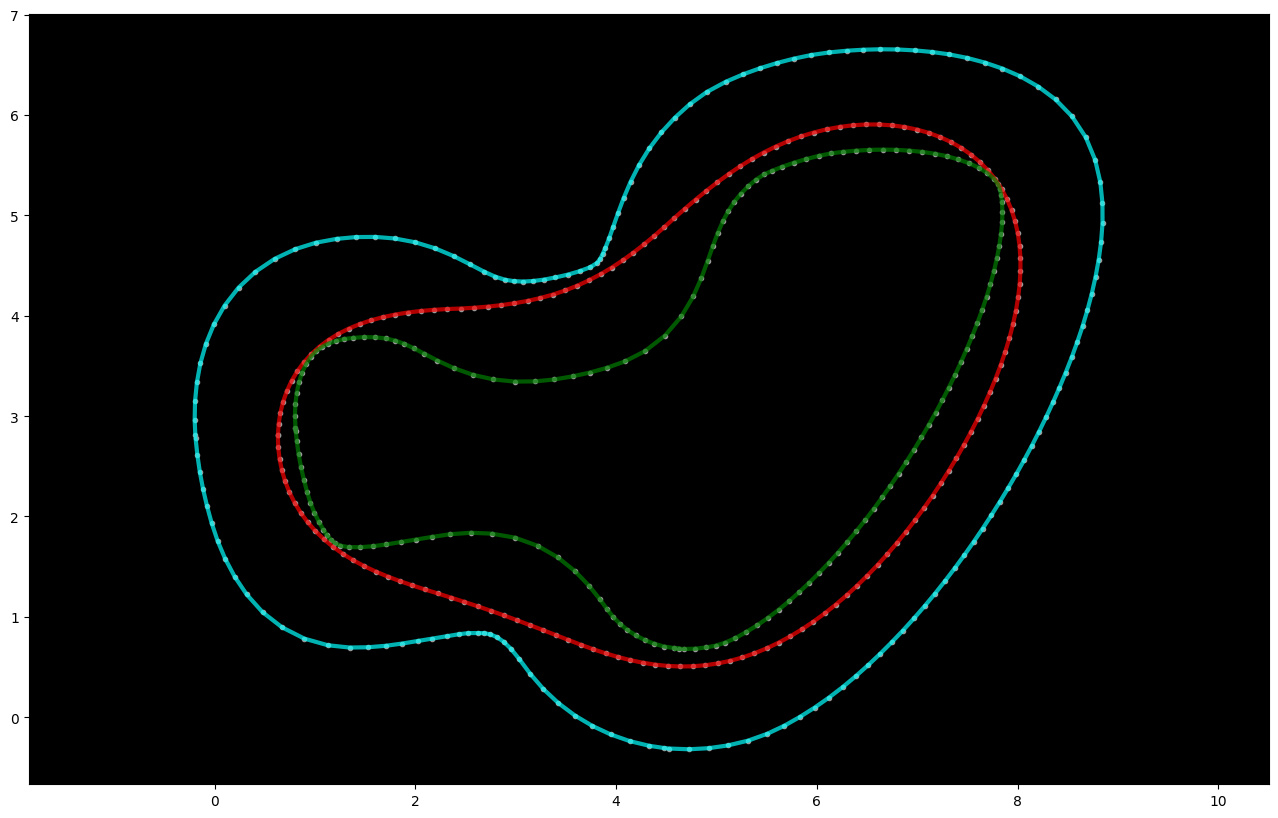

In [19]:
# need to put duplicate point race_line[0] at race_line[-1] to make a closed loops
loop_race_line = np.append(race_line, [race_line[0]], axis=0)

# These should be the same
print("These should be the same: ", (center_line.shape, loop_race_line.shape))
print("Original centerline length: %0.2f" % l_center_line.length)
print("New race line length: %0.2f" % LineString(loop_race_line).length)

fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, loop_race_line, np_inner_points, np_outer_points)

In [21]:
for pair in loop_race_line:
    print(pair[0])

0.6306910855808379
0.6336712502600561
0.64671879844676
0.6697223050606538
0.7025150580147865
0.7448758872516801
0.7965292269381135
0.8571445889604701
0.9263357102737471
1.0036597543535617
1.0886172129266198
1.1806536995778907
1.27916562451252
1.3835122734099072
1.4930357972437118
1.6070863658096604
1.7250419173566693
1.8463044315529822
1.9702560300742156
2.09617545495538
2.2231516963031606
2.355769763848039
2.488141560880269
2.620103720427086
2.7515551494884045
2.882456931209304
3.012839289948518
3.1427840323592005
3.272395377041519
3.4017887089897707
3.525342917396783
3.64882806345605
3.772250536689716
3.8956574404119717
4.019126284507557
4.142731944487423
4.266522653410114
4.3905079951724115
4.514656201929046
4.6388964110707045
4.763122708959208
4.887198566945313
5.010961461768899
5.134227886556341
5.256798894774465
5.378466104203227
5.499017908693244
5.618245558333863
5.735948761788441
5.851940508679295
5.966050880918649
6.078129704479884
6.188047977606734
6.295698090655126
6.400992